In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast 

In [5]:
dataset = load_dataset('lukebarousse/data_jobs')

Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\chairman\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Sun Aug 25 01:49:57 2024).


In [11]:
df = dataset['train'].to_pandas()
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


In [12]:
# clean job_posted_date and job_skills
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list : ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)


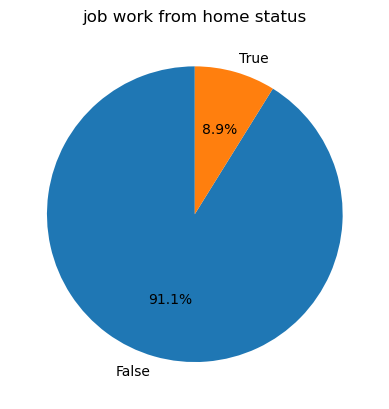

In [5]:
df['job_work_from_home'].value_counts().plot(kind= 'pie', startangle = 90, autopct = '%1.1f%%')
plt.title('job work from home status')
plt.ylabel('')
plt.show()

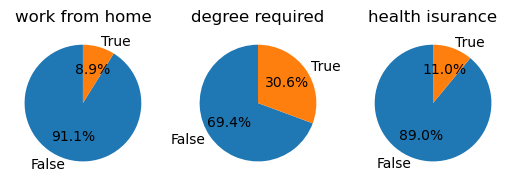

In [6]:
# plotting [job_work_from_home,job_no_degree_mention,job_health_insurance] in a subplot

fig, ax = plt.subplots(1,3)

dict_v = {
    'job_work_from_home':'work from home',
    'job_no_degree_mention':'degree required',
    'job_health_insurance':'health isurance'
}


for i, (column,title) in enumerate(dict_v.items()) : 
   df[column].value_counts().plot(kind= 'pie', ax=ax[i], startangle = 90, autopct= '%1.1f%%', title=title )
   ax[i].set_ylabel('')
   
plt.show()

In [7]:
df = df[df['job_title_short'] == 'Data Analyst']

In [8]:
df_exploded = df.explode('job_skills')

In [9]:
skill_stat = df_exploded.groupby('job_skills').agg(
    median_salary = ('salary_year_avg', 'median'),
    skill_count = ('job_skills','count')
)



In [10]:
skill_countt = 20

skill_stat=skill_stat.sort_values(by='skill_count', ascending=False).head(skill_countt)

In [11]:
skill_stat

,median_salary,skill_count
job_skills,,
sql,92500.000000,92428
excel,84479.000000,66860
python,98500.000000,57190
tableau,95000.000000,46455
power bi,90000.000000,39380
r,92527.500000,29996
sas,90000.000000,27998
powerpoint,85000.000000,13822
word,80000.000000,13562


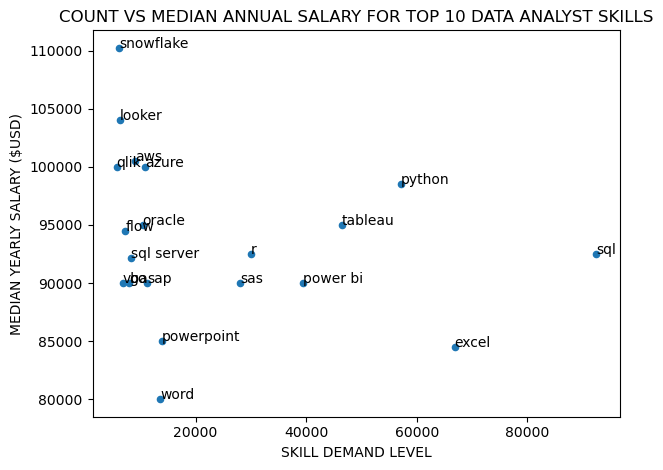

In [12]:
skill_stat.plot(kind='scatter', x='skill_count', y='median_salary')
plt.ylabel('MEDIAN YEARLY SALARY ($USD)')
plt.xlabel('SKILL DEMAND LEVEL')
plt.title('COUNT VS MEDIAN ANNUAL SALARY FOR TOP 10 DATA ANALYST SKILLS')
plt.tight_layout()

for i , skill in enumerate(skill_stat.index):
  plt.text(skill_stat['skill_count'].iloc[i],skill_stat['median_salary'].iloc[i],skill)



plt.show()


In [13]:
from adjustText import adjust_text


skill_stat.plot(kind='scatter', x='skill_count', y='median_salary')

texts =[]

for i , skill in enumerate(skill_stat.index):
  texts.append(plt.text(skill_stat['skill_count'].iloc[i],skill_stat['median_salary'].iloc[i],skill))

adjust_text(texts,arrowprops= dict(arrowstyle='->',color='gray'))

ax= plt.gca()
ax.yaxis.set_major_formatter(plt.funcformatter(lambda y, pos: f"${int(y/1000)}k"))

plt.ylabel('MEDIAN YEARLY SALARY ($USD)')
plt.xlabel('SKILL DEMAND LEVEL')
plt.title('COUNT VS MEDIAN ANNUAL SALARY FOR TOP 10 DATA ANALYST SKILLS')
plt.tight_layout()

plt.show()


ModuleNotFoundError: No module named 'adjustText'

In [14]:
skill_stat

,median_salary,skill_count
job_skills,,
sql,92500.000000,92428
excel,84479.000000,66860
python,98500.000000,57190
tableau,95000.000000,46455
power bi,90000.000000,39380
r,92527.500000,29996
sas,90000.000000,27998
powerpoint,85000.000000,13822
word,80000.000000,13562


**HISTOGRAM AND BOXPLOT

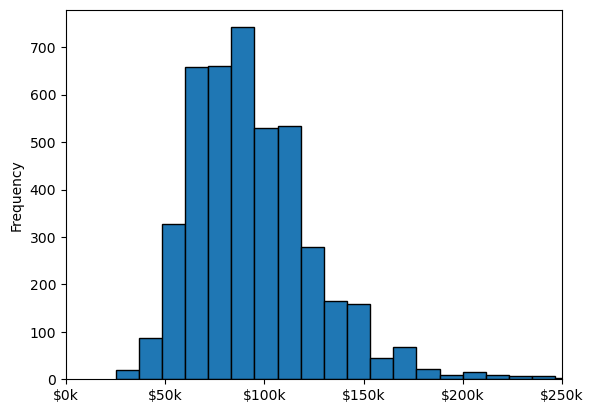

In [31]:
# histogram and boxplot
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US['salary_year_avg'].plot(kind= 'hist', bins=30, edgecolor='black')
plt.xlim(0,250000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f"${int(x/1000)}k"))

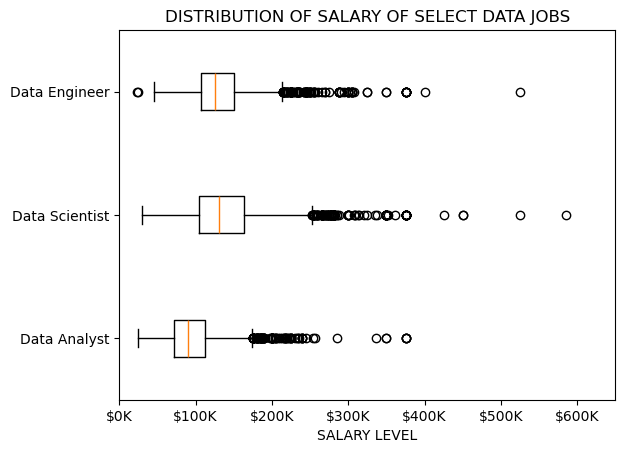

In [6]:
job_titles = ['Data Analyst','Data Scientist', 'Data Engineer']


df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US= df_US.dropna(subset=['salary_year_avg'])
job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels= job_titles,vert=False)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f"${int(x/1000)}K"))
plt.title('DISTRIBUTION OF SALARY OF SELECT DATA JOBS')
plt.xlabel('SALARY LEVEL')
plt.xlim(0,650000)

plt.show()

In [13]:
import seaborn as sns

In [19]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()


In [32]:
df_DA_US= df_DA_US.dropna(subset=['salary_year_avg'])

In [26]:
type(df_DA_US['job_skills'][68])

list

In [ ]:
df_exploded = df_DA_US.explode('job_skills')
df_exploded

In [29]:
df_tsa = df_exploded.groupby('job_skills')['salary_year_avg'].agg(['median','count'])
df_tsa

,median,count
job_skills,,
airflow,116250.00,44
airtable,90000.00,5
alteryx,106281.25,106
angular,107500.00,8
ansible,159640.00,1
...,...,...
workfront,75000.00,3
wrike,75000.00,1
xamarin,NaN,0


In [43]:
df_top_skills = df_tsa.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending= False).head(10)
df_top_pay = df_tsa.sort_values(by='median', ascending= False).head(10)
df_top_pay

,median,count
job_skills,,
dplyr,196250.0,2
bitbucket,189000.0,3
gitlab,186000.0,3
solidity,179000.0,1
hugging face,175000.0,1
couchbase,160515.0,1
ansible,159640.0,1
mxnet,149000.0,2
cassandra,148250.0,6


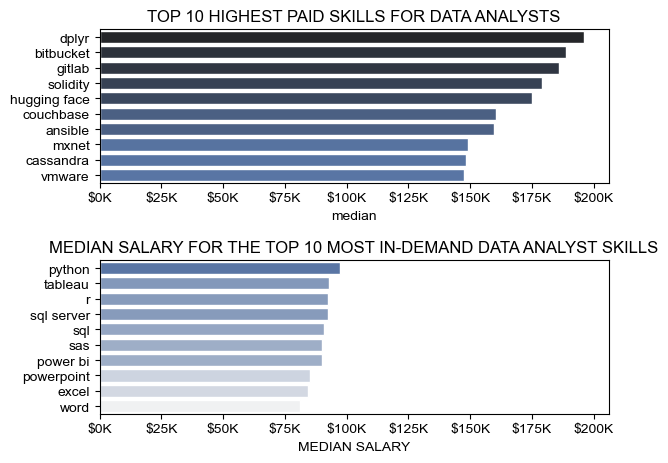

In [53]:
fig,ax = plt.subplots(2,1)
sns.set_theme(style='ticks')
sns.barplot(data= df_top_pay, x='median', y=df_top_pay.index, ax=ax[0], hue='median', palette= 'dark:b_r')
#df_top_pay.plot(kind='barh', y= 'median', ax=ax[0])
ax[0].set_title('TOP 10 HIGHEST PAID SKILLS FOR DATA ANALYSTS')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f"${int(x/1000)}K"))
ax[0].invert_yaxis
ax[0].legend().remove()
ax[0].set_ylabel('')


sns.barplot(data= df_top_skills , x='median', y=df_top_skills.index, ax=ax[1], hue= 'median', palette='light:b')
#df_top_skills.plot(kind='barh' , y = 'median', ax= ax[1])
ax[1].set_title('MEDIAN SALARY FOR THE TOP 10 MOST IN-DEMAND DATA ANALYST SKILLS')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f"${int(x/1000)}K"))
ax[1].invert_yaxis
ax[1].legend().remove()
ax[1].set_ylabel('')
ax[1].set_xlabel('MEDIAN SALARY')
ax[1].set_xlim(ax[0].get_xlim())

fig.tight_layout()
plt.show()


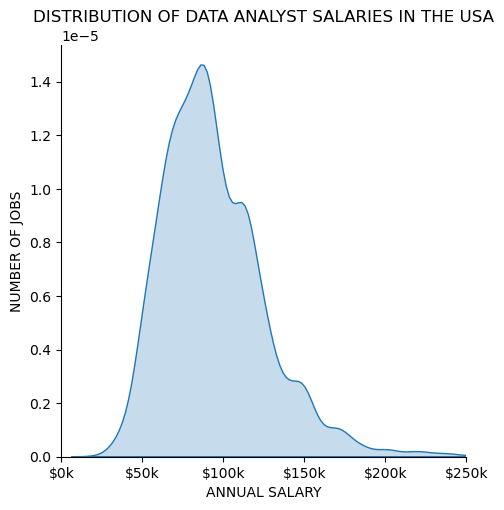

In [27]:
#histogram with seaborn  displot


sns.displot(data= df_DA_US['salary_year_avg'], kind='kde',fill=True) 
plt.xlabel('ANNUAL SALARY')
plt.ylabel('NUMBER OF JOBS')
plt.xlim(0,250000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f"${int(x/1000)}k"))
plt.title('DISTRIBUTION OF DATA ANALYST SALARIES IN THE USA')
plt.show()

In [35]:
job_titles = ['Data Analyst','Data Scientist','Data Engineer']

df_US = df[(df['job_title_short'].isin(job_titles))&(df['job_country']=='United States')]
df_US = df_US.dropna(subset='salary_year_avg')

In [39]:
job_list = [df_US[df_US['job_title_short'] == job]['salary_year_avg'] for job in job_titles]

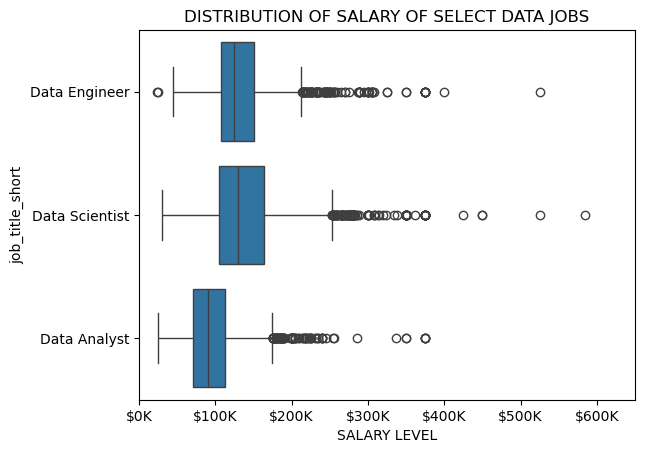

In [40]:
# boxplot with seaborn -- no need for job_titles[list], and series list just the prepared data frame 
sns.boxplot(data=df_US, x='salary_year_avg', y= 'job_title_short')   
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f"${int(x/1000)}K"))
plt.title('DISTRIBUTION OF SALARY OF SELECT DATA JOBS')
plt.xlabel('SALARY LEVEL')
plt.xlim(0,650000)

plt.show()